## Init SQLAchemy table

In [114]:
from sqlalchemy import Column, Integer, String, Float, Boolean, DateTime
from sqlalchemy.orm import declarative_base
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

In [115]:
Base = declarative_base()

class CreditFile(Base):
    __tablename__ = 'credit_file'
    
    id = Column(Integer, primary_key=True, autoincrement=True)
    lastname = Column(String(100), nullable=True)
    firstname = Column(String(100),  nullable=True)
    age = Column(Integer, nullable=True)
    height_cm = Column(Float, nullable=True)
    weight_kg = Column(Float, nullable=True)
    gender = Column(String(10), nullable=True)
    has_sports_license = Column(Boolean, nullable=True)
    education_level = Column(String(100), nullable=True)
    region = Column(String(100), nullable=True)
    is_smoker = Column(Boolean, nullable=True)
    is_french_national = Column(Boolean,  nullable=True)
    estimated_monthly_income = Column(Float, nullable=True)
    marital_status = Column(String(50), nullable=True)
    credit_history = Column(String(500), nullable=True)
    personal_risk_score = Column(Float, nullable=True)
    account_created_at = Column(DateTime, nullable=True)
    credit_score = Column(Integer, nullable=True)
    monthly_rent = Column(Float, nullable=True)
    loan_amount_requested = Column(Float, nullable=True)


### Create memory database

In [116]:
engine = create_engine('sqlite:///:memory:')  # In-memory database
Base.metadata.create_all(engine)
Session = sessionmaker(bind=engine)
session = Session()

### Add a simple data

In [117]:
sample = CreditFile(
    lastname="Smith",
    firstname="John",
    age=35,
    height_cm=180.5,
    weight_kg=75.2,
    gender="Male",
    has_sports_license=True,
    education_level="Master's Degree",
    region="Île-de-France",
    is_smoker=False,
    is_french_national=True,
    estimated_monthly_income=4200.00,
    marital_status="Married",
    credit_history="Good",
    personal_risk_score=0.2,
    credit_score=750,
    monthly_rent=950.0,
    loan_amount_requested=15000.0
)
session.add(sample)
session.commit()

### Display result data

In [118]:
results = session.query(CreditFile).all()

for client in results:
    print(f"{client.firstname} {client.lastname}, Age: {client.age}, Score: {client.credit_score}, Income: €{client.estimated_monthly_income}")

John Smith, Age: 35, Score: 750, Income: €4200.0


### Update data

In [119]:
# Get first item
first_item = session.query(CreditFile).first()

# Update value
first_item.firstname = "Thomas"
first_item.lastname = "Houtin"
session.commit()

# Show result
results = session.query(CreditFile).all()

for client in results:
    print(f"{client.firstname} {client.lastname}, Age: {client.age}, Score: {client.credit_score}, Income: €{client.estimated_monthly_income}")

Thomas Houtin, Age: 35, Score: 750, Income: €4200.0


### Remove data

In [120]:
# Get first item
first_item = session.query(CreditFile).first()

# Remove if exist
if first_item:
    session.delete(first_item)
    session.commit()
    print("item removed.")

    results = session.query(CreditFile).all()
else:
    print("No item to removed.")

for client in results:
    print(f"{client.firstname} {client.lastname}, Age: {client.age}, Score: {client.credit_score}, Income: €{client.estimated_monthly_income}")
else:
    print("No item found")

item removed.
No item found


---

## Insert data into database from CSV

### Load csv

In [121]:
import pandas as pd
df = pd.read_csv('data/data.csv')

In [122]:
### Show missing value

<Axes: >

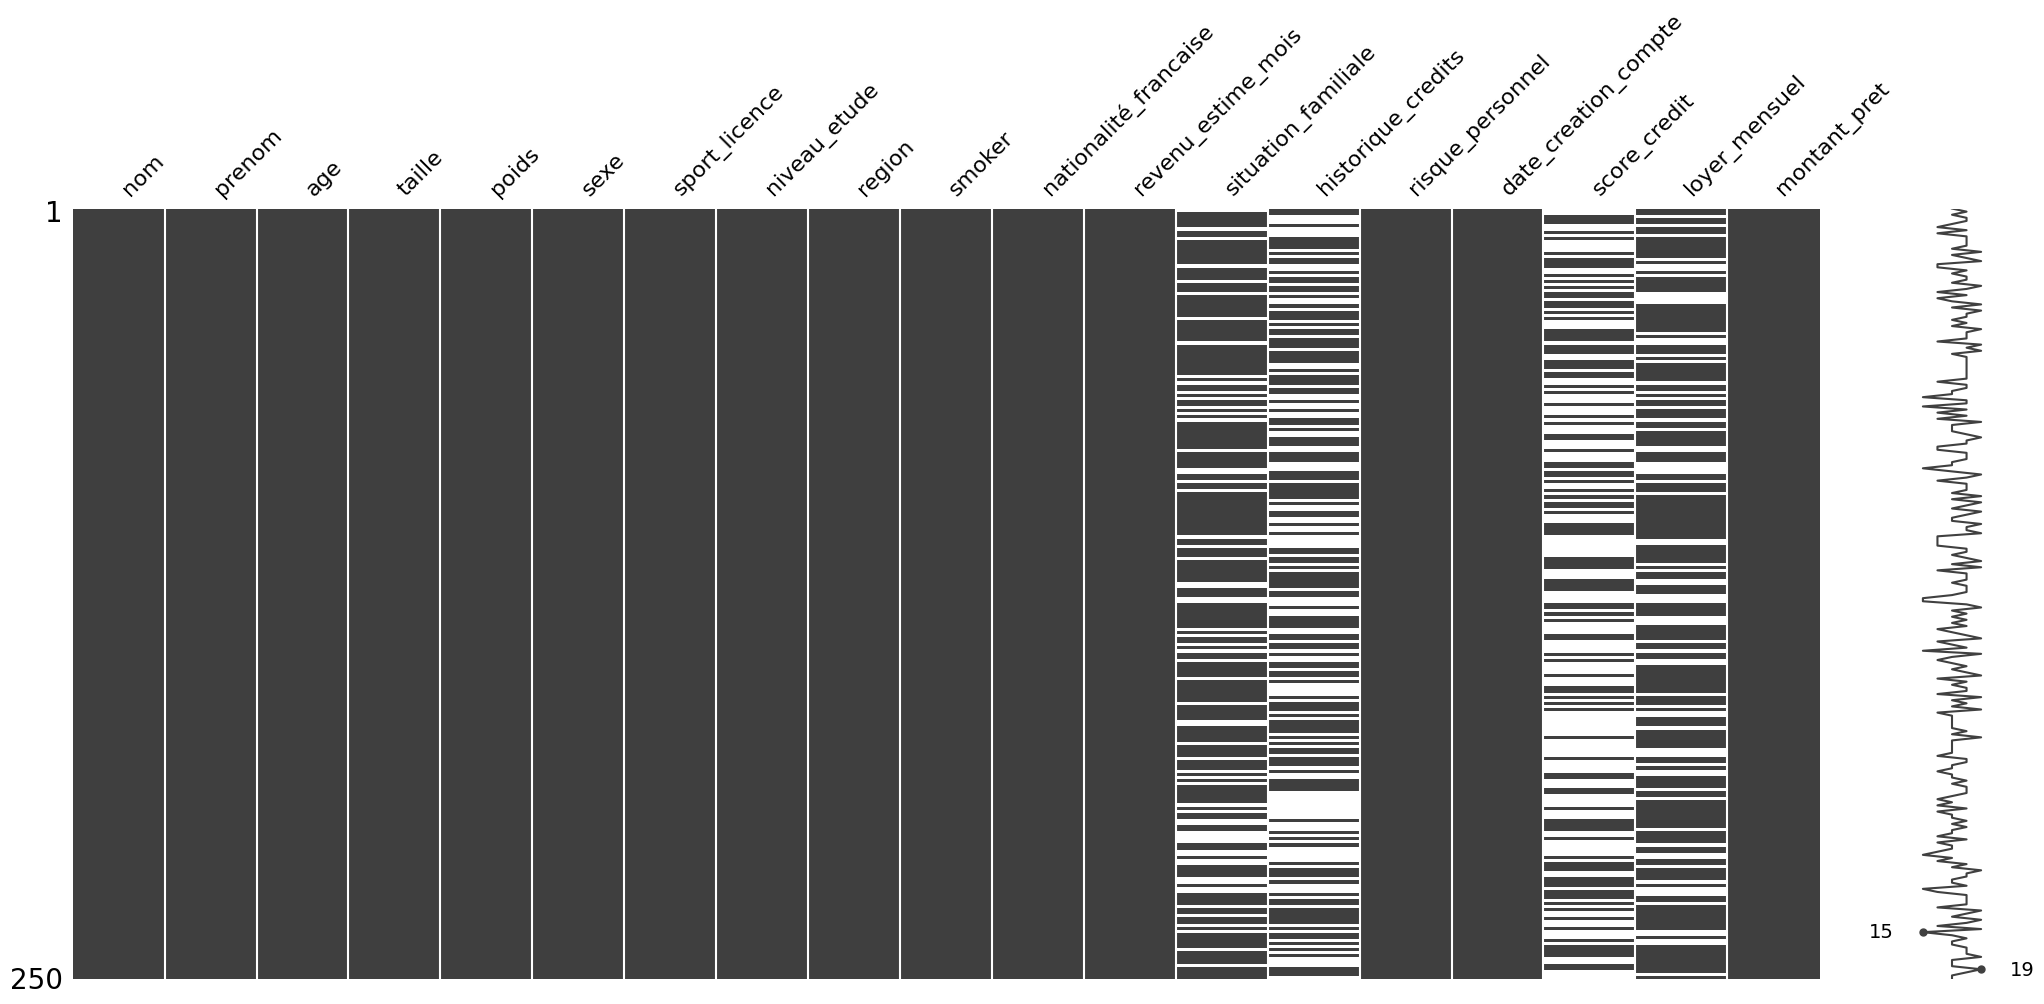

In [123]:
import missingno as msno

%matplotlib inline
msno.matrix(df.sample(250))

### Add in table

In [124]:
for _, row in df.iterrows():
    client = CreditFile(
        lastname=row['nom'],
        firstname=row['prenom'],
        age=row['age'],
        height_cm=row['taille'],
        weight_kg=row['poids'],
        gender=row['sexe'],
        has_sports_license=bool(row['sport_licence']),
        education_level=row['niveau_etude'],
        region=row['region'],
        is_smoker=bool(row['smoker']),
        is_french_national=bool(row['nationalité_francaise']),
        estimated_monthly_income=row['revenu_estime_mois'],
        marital_status=row['situation_familiale'],
        credit_history=row['historique_credits'],
        personal_risk_score=row['risque_personnel'],
        account_created_at=pd.to_datetime(row['date_creation_compte']) if row['date_creation_compte'] else datetime.utcnow(),
        credit_score=row['score_credit'],
        monthly_rent=row['loyer_mensuel'],
        loan_amount_requested=row['montant_pret']
    )
    session.add(client)

# Save in table
session.commit()

In [125]:
results = session.query(CreditFile).all()

for client in results:
    print(f"{client.firstname} {client.lastname}, Age: {client.age}, Score: {client.credit_score}, Income: €{client.estimated_monthly_income}")

Steven Foster, Age: 19, Score: None, Income: €4958.0
Todd Tapia, Age: 31, Score: None, Income: €3001.0
Michelle Hardy, Age: 68, Score: 576, Income: €3758.0
Kenneth Newton, Age: 50, Score: None, Income: €3967.0
Kathleen Davila, Age: 42, Score: None, Income: €2091.0
Christina Henry, Age: 31, Score: 556, Income: €5731.0
Shane Cabrera, Age: 54, Score: 515, Income: €886.0
Daniel Patterson, Age: 27, Score: None, Income: €1061.0
James Deleon, Age: 31, Score: 818, Income: €1540.0
Daniel Johnston, Age: 54, Score: None, Income: €3447.0
Michael Edwards, Age: 63, Score: 404, Income: €1820.0
Eric Hernandez, Age: 68, Score: 414, Income: €1684.0
Lauren Smith, Age: 73, Score: None, Income: €2310.0
Emily Roberson, Age: 57, Score: 629, Income: €3140.0
Sara Watts, Age: 35, Score: 516, Income: €4089.0
Brett Graves, Age: 25, Score: 511, Income: €3387.0
Joshua Williams, Age: 40, Score: 746, Income: €2622.0
Lauren Brown, Age: 25, Score: None, Income: €3158.0
Judith Black, Age: 34, Score: None, Income: €1959.

---

### Call insert data methode

In [126]:
from crud.client import create_client, show_values
from database import SessionLocal, create_tables
from models.client import ClientProfile

# Create tables if needed
create_tables()
show_values(SessionLocal()) # could be empty

# Add one client
new_client = ClientProfile(
    lastname="Smith",
    firstname="John",
    age=35,
    height_cm=180.5,
    weight_kg=75.2,
    gender="Male",
    has_sports_license=True,
    education_level="Master's Degree",
    region="Île-de-France",
    is_smoker=False,
    is_french_national=True,
    estimated_monthly_income=4200.00,
    marital_status="Married",
    credit_history="Good",
    personal_risk_score=0.2,
    credit_score=750,
    monthly_rent=950.0,
    loan_amount_requested=15000.0,
)
create_client(SessionLocal(), new_client)
show_values(SessionLocal()) # John Smith, Age: 35, Score: 750, Income: €4200.0

John Smith, Age: 35, Score: 750, Income: €4200.0
John Smith, Age: 35, Score: 750, Income: €4200.0
John Smith, Age: 35, Score: 750, Income: €4200.0


---

### Train model

2025-06-17 16:36:07.903135: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step


/home/thomas/atlas/projects/sql-alchemy/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


=================Default=train=performance==================
MSE: 177601760.2618, MAE: 7953.8100, R²: -0.5533
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step
==================Default=test=performance==================
MSE: 195868537.9837, MAE: 8502.7718, R²: -0.5851
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step
=================Performance=after=training=================
MSE: 39842963.9593, MAE: 4029.3446, R²: 0.6776


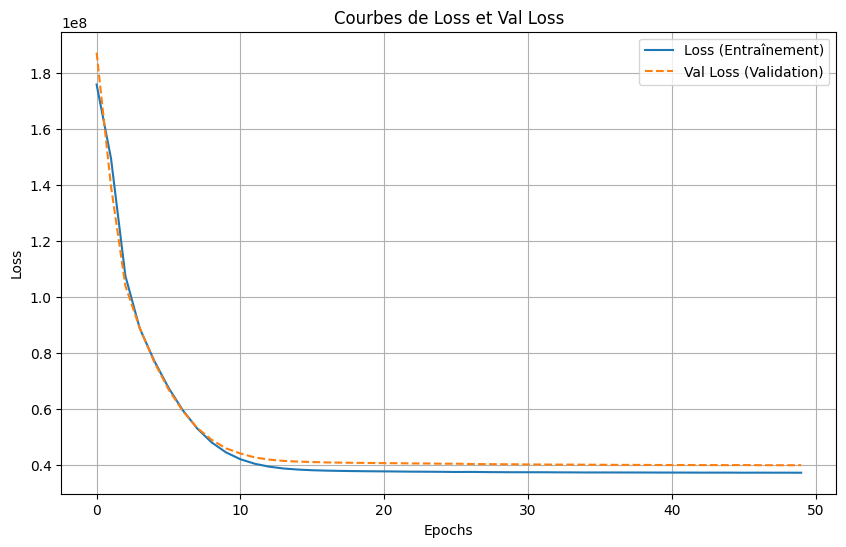

ModuleNotFoundError: __path__ attribute not found on 'module.generate_model' while trying to find 'module.generate_model.py'

In [128]:

%run -m module.generate_model.py